Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


Importing of Libraries

# Avacado project as Regression problem

In [300]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [301]:
Avocado=pd.read_csv('avocado.csv')
Avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The input contains boths label and target variable.
In task 1, "Average Price" is the target variable which contains continuous data, so it is a regression type problem.
In task 2, "Region" is the target variable which has classes, so it is a classification problem.


In [302]:
Avocado.shape

(18249, 14)

 we can see that  we have 18249 rows and  14 columns ie attributes and when we check the shape its showing 14 which mean one column is target and it is 'AveragePrice'

In [303]:
Avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [304]:
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


All the the 14 columns have No Null values and out of 14 attributes or input columns we have only 1 columns as output and and rest all are 15 columns are int -02,objectt-03 and Float=09. and object has to be changed using Ordinal encoder

In [305]:
Avocado.columns = Avocado.columns.str.replace(' ', '_')
Avocado.columns

Index(['Unnamed:_0', 'Date', 'AveragePrice', 'Total_Volume', '4046', '4225',
       '4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region'],
      dtype='object')

 Input features: Unnamed:_0','Date',,Total_Volume','4046','4225','4770','Total_Bags','Small_Bags','Large_Bags', 'XLarge_Bags', 'type', 'year','region 
 Output Features-'AveragePrice'

In [306]:
Avocado.isnull().sum()     #no Missing Values

Unnamed:_0      0
Date            0
AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

Here we can clearly see that we have 0 null values in all the columns . .

In [307]:
# Changing date column from object type to Date Type
Avocado['Date']=pd.to_datetime(Avocado['Date'])


In [308]:
Avocado['Month']=Avocado['Date'].apply(lambda x:x.month)
Avocado['Day']=Avocado['Date'].apply(lambda x:x.day)

In [309]:
Avocado

,Unnamed:_0,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [310]:
# Now Lets Drop Date columns from the dataset bcz we have already made the columns for Month and day in the dateset above 
# Year columns was already pre mentioned in the dateset
#dropping the columns with very high multicollinearity
Avocado.drop(['Unnamed:_0','Date'],axis=1,inplace=True)
Avocado

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [311]:
#dropping duplicate rows and resetting index
Avocado=Avocado.drop_duplicates()
print('Number of rows after removing duplicates=', len(Avocado))

Number of rows after removing duplicates= 18249


<AxesSubplot:>

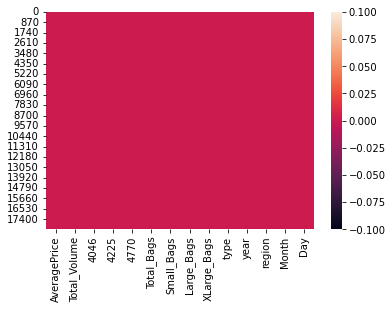

In [312]:
sns.heatmap(Avocado.isnull())

Hence, No Null Values in the dataframe

In [313]:
Avocado.duplicated().sum()# No Duplicate Values

0

In [314]:
Avocado.isnull().sum()

AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

Univariate Analysis 'Subscribed' variable

In [315]:
#Frequency of 'AveragePrice'
Avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

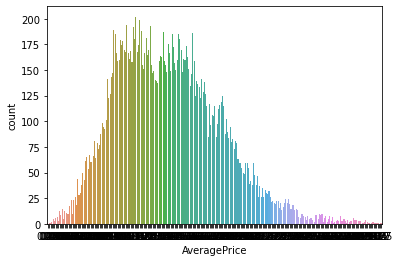

In [316]:
# Plotting the 'AveragePrice' frequency
sns.countplot(data=Avocado,x='AveragePrice')

In [317]:
#Normalizing the frequency table of 'AveragePrice' variable
Avocado['AveragePrice'].value_counts(normalize=True)

1.15    0.011069
1.18    0.010905
1.08    0.010631
1.26    0.010576
1.13    0.010521
          ...   
3.25    0.000055
3.12    0.000055
2.68    0.000055
3.03    0.000055
3.17    0.000055
Name: AveragePrice, Length: 259, dtype: float64

In [318]:
#Frequency table
Avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

# EDA

Encoding Techniques

In [319]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Avocado.columns:
    if Avocado[i].dtypes=='object':
        Avocado[i]=enc.fit_transform(Avocado[i].values.reshape(-1,1))
Avocado.tail(20)

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
18229,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,1.0,2018,52.0,2,25
18230,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,1.0,2018,52.0,2,18
18231,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,1.0,2018,52.0,2,11
18232,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,1.0,2018,52.0,2,4
18233,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,1.0,2018,52.0,1,28
18234,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,1.0,2018,52.0,1,21
18235,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,1.0,2018,52.0,1,14
18236,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,1.0,2018,52.0,1,7
18237,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,1.0,2018,53.0,3,25
18238,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,1.0,2018,53.0,3,18


Region  and Type is conveted into float  from Object  

In [320]:
Avocado.dtypes

AveragePrice    float64
Total_Volume    float64
4046            float64
4225            float64
4770            float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge_Bags     float64
type            float64
year              int64
region          float64
Month             int64
Day               int64
dtype: object

So here we can that our target variable 'AveragePrice' is in float format ,and by this we can make the decision that we have to build a Regression Model. . 

Visualization using Count and Bar Plot for Input and output Variables

In [321]:
for column in Avocado.columns:
    sns.barplot(x=column,y='AveragePrice',data=Avocado)
    plt.xlabel(column)
    plt.show()

KeyboardInterrupt: 

In [ ]:
for column in Avocado.columns:
    sns.countplot(x=column, data=Avocado)
    plt.xlabel(column)
    plt.ylabel('W')
    plt.show()

Histogram View 

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total_Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total_Bags'}>,
        <AxesSubplot:title={'center':'Small_Bags'}>,
        <AxesSubplot:title={'center':'Large_Bags'}>],
       [<AxesSubplot:title={'center':'XLarge_Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

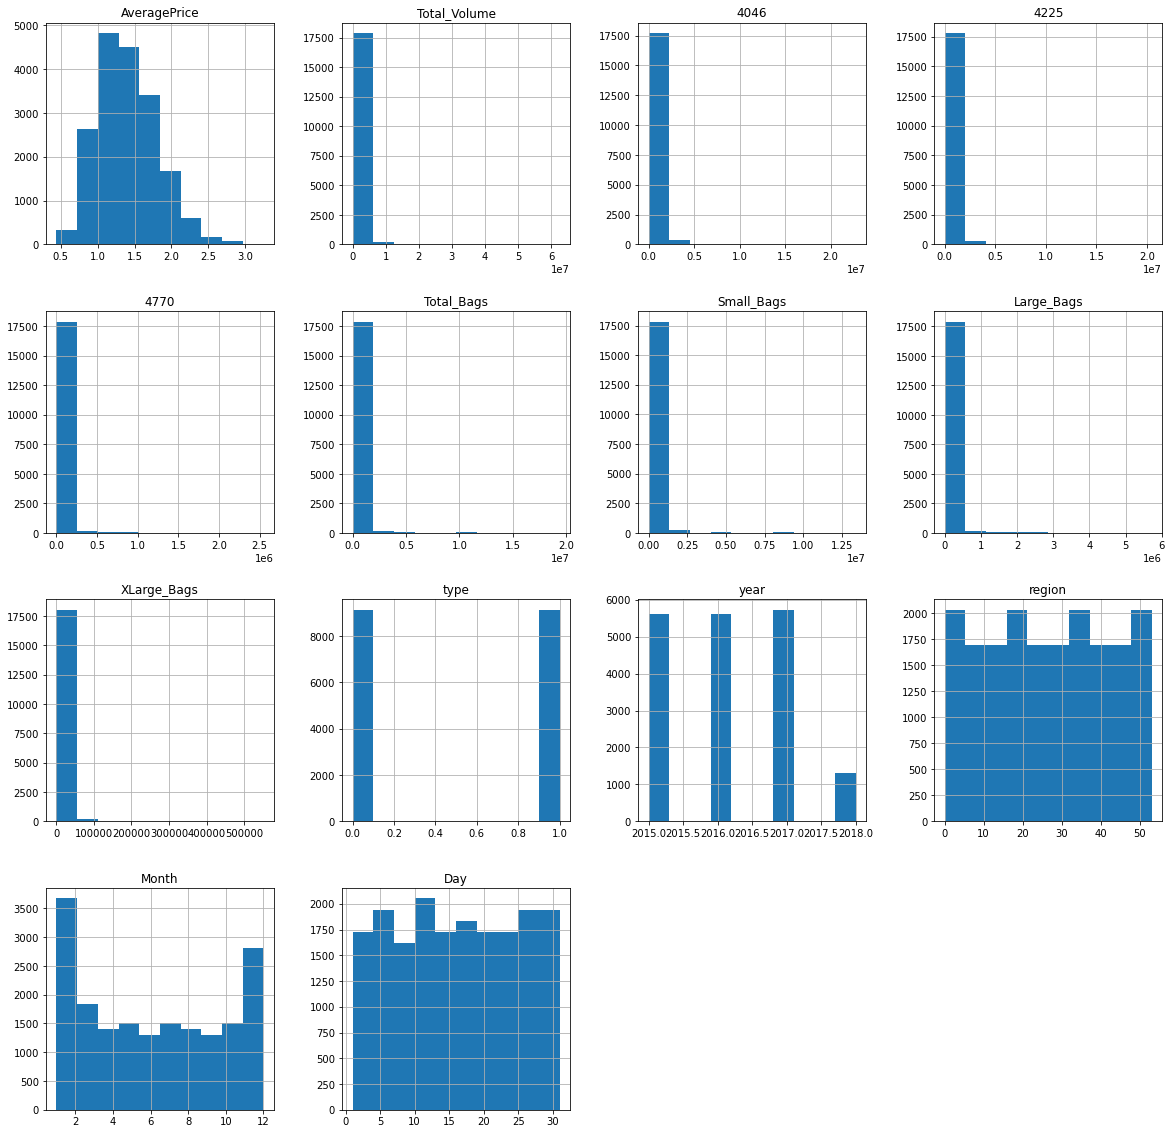

In [22]:
Avocado.hist(bins=10, figsize=(20,20))

In [ ]:
for column in Avocado.columns:
    sns.barplot(x=column,y='AveragePrice',data=Avocado)
    plt.xlabel(column)
    plt.show()

# Bivarate

In [ ]:
sns.scatterplot(x='type',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Total_Volume',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='4046',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='4225',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Total_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='4770',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Small_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Large_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='XLarge_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='year',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='region',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Month',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Day',y='AveragePrice',data=Avocado)

SV,ERA,SHO and R are having Linear Relationship with the target variable or WIN..Rest all columns have scattered data and are non linear to target

Multivariate Analysis

KeyboardInterrupt: 

<Figure size 1800x2160 with 0 Axes>

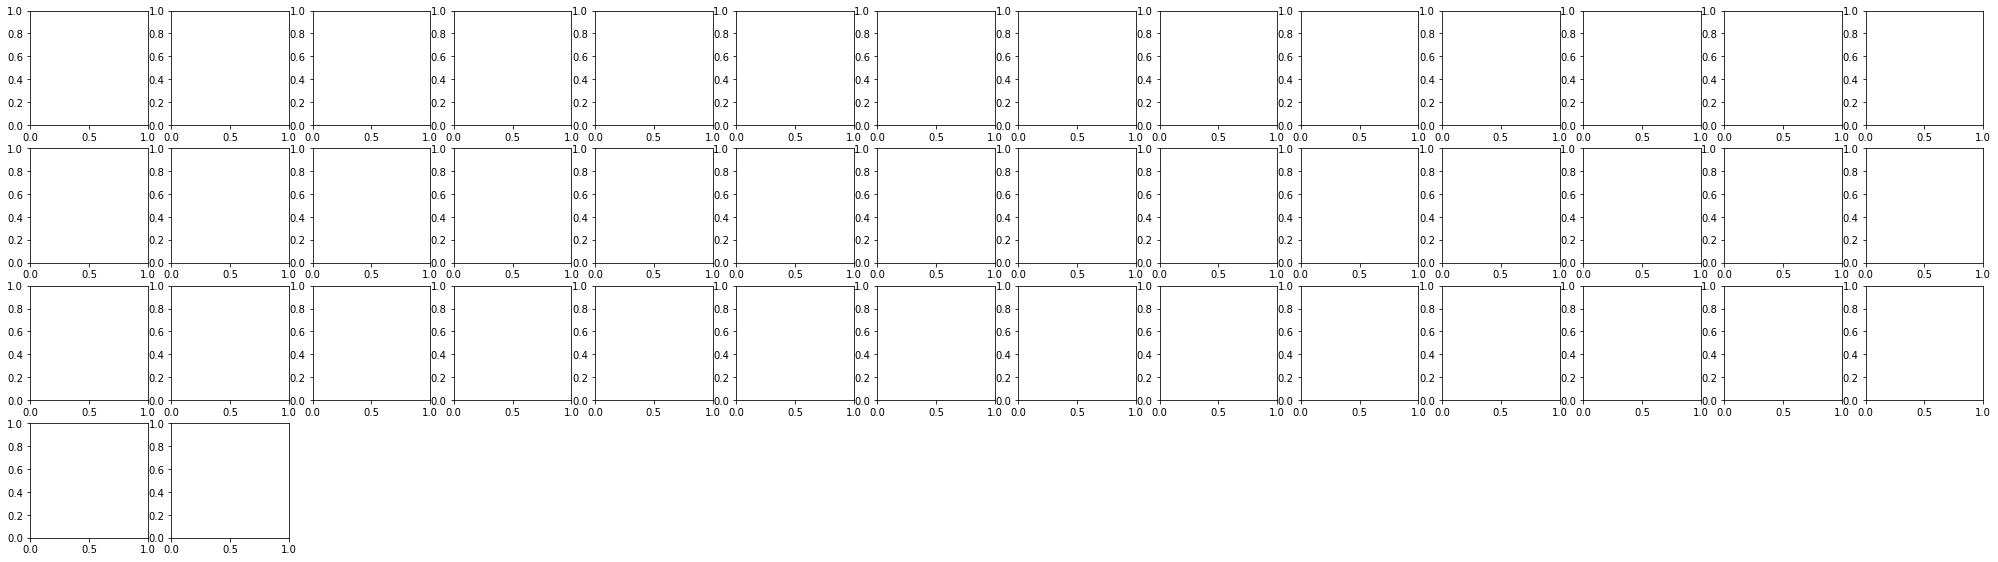

In [322]:
plt.figure(figsize=(25,30))
sns.pairplot(Avocado)
plt.show()

This pair plot gives the relation between the columns which are plotted on the basis of target variable 'W'=Win

Now Lets See that counts of each columns

In [323]:
for i in Avocado.columns:
        print(Avocado[i].value_counts())
        print('*'*100)

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64
****************************************************************************************************
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total_Volume, Length: 18237, dtype: int64
****************************************************************************************************
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64
****************************************************************************************************
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
          

<AxesSubplot:>

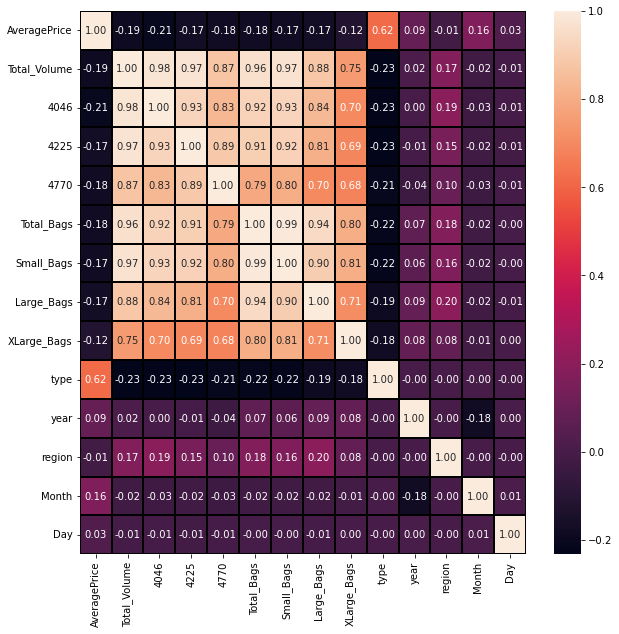

In [324]:
plt.figure(figsize = (10,10))
sns.heatmap(Avocado.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

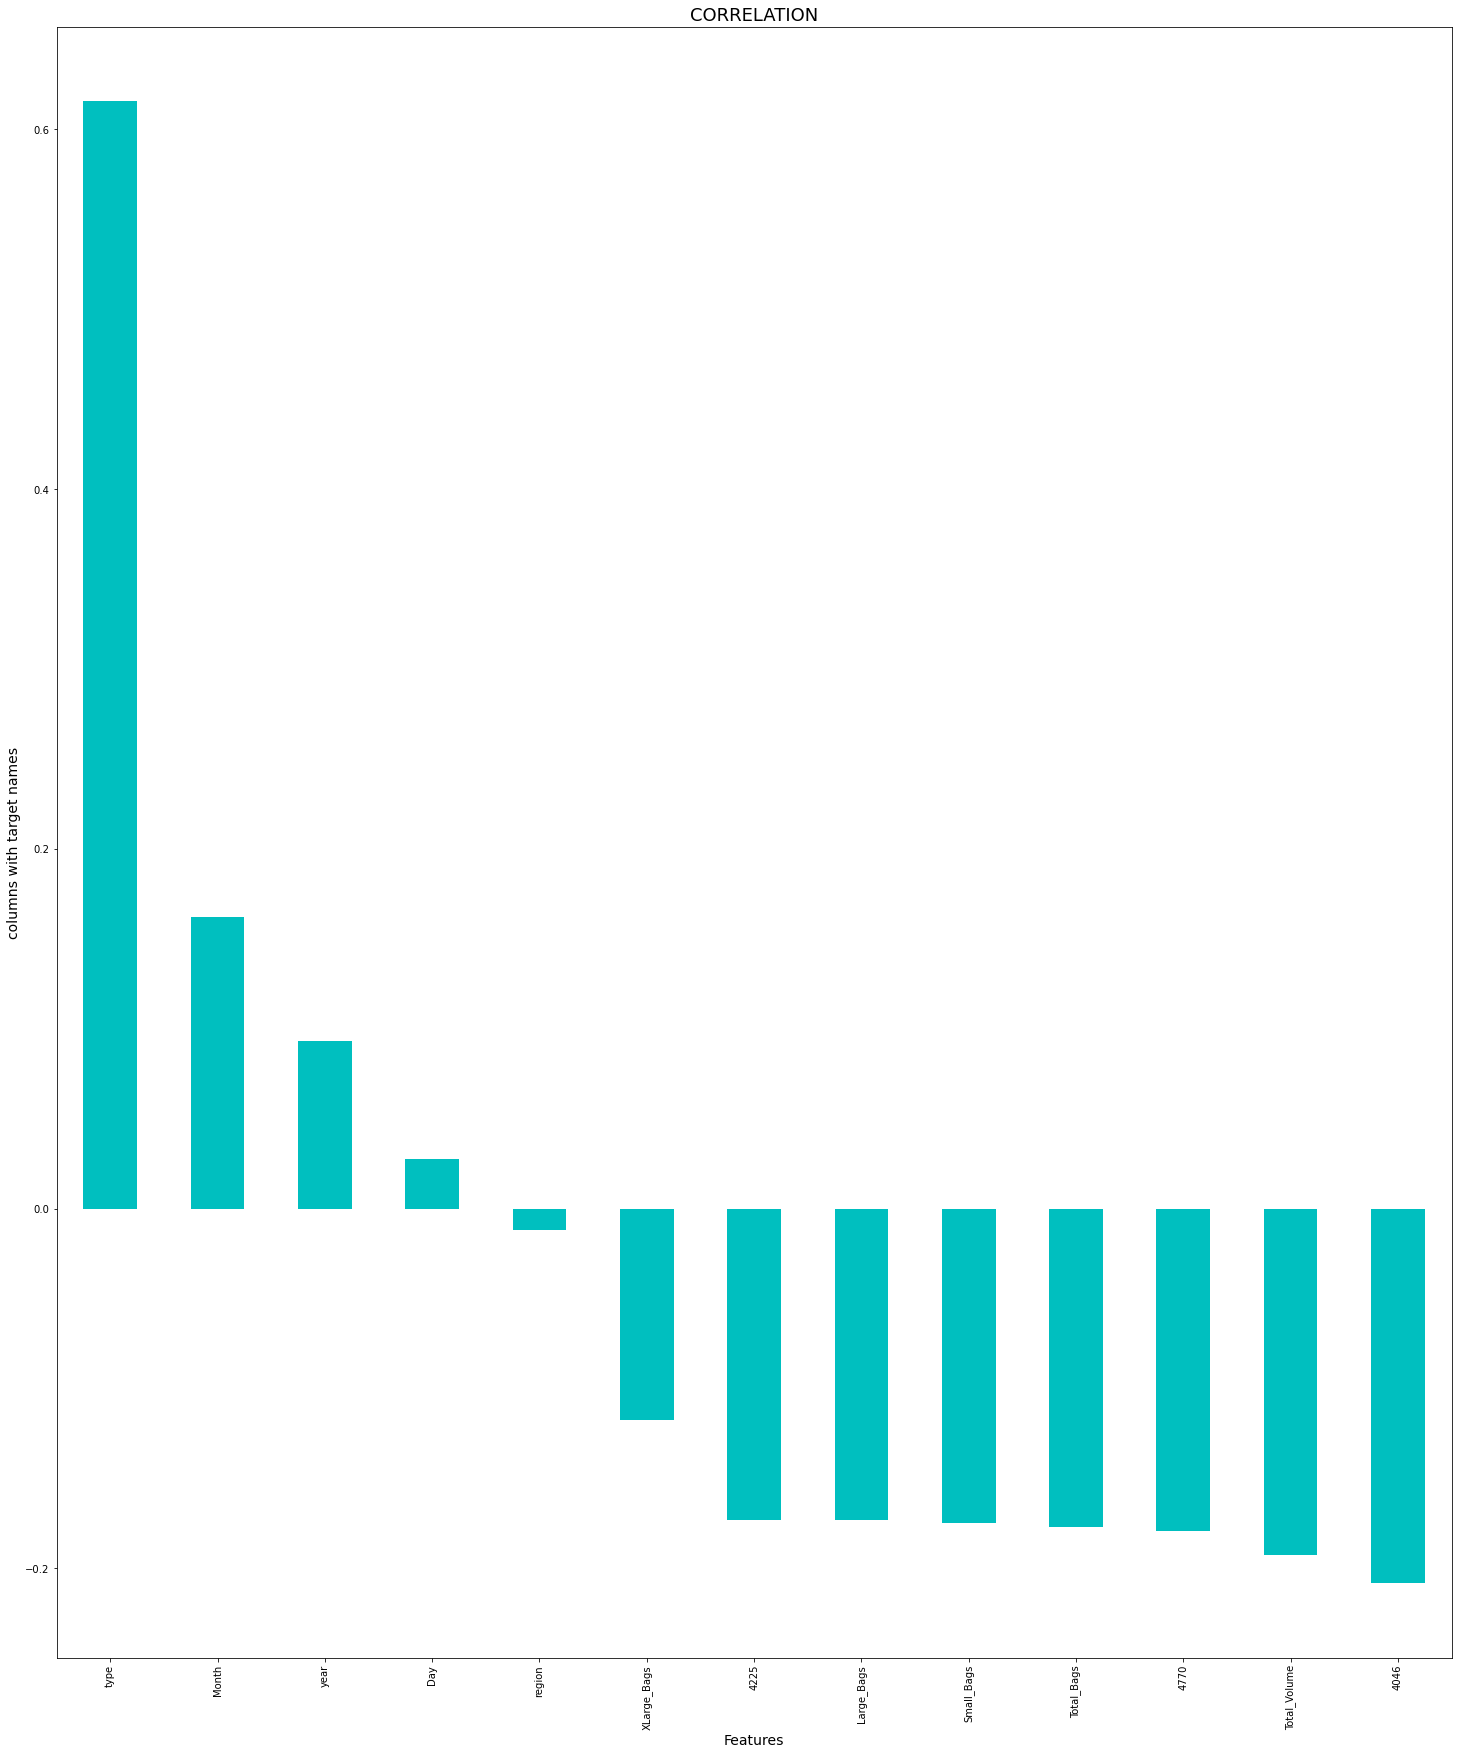

In [325]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Avocado.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

Here  positive correlated columns are upwards and Negative are    Downwards

4046,Total Volume and Total Bags are highly correlated to many columns.
AveragePrice is negitively correalted to all of the columns.

Now Lets Delete the columns which are Negatively corrlated to target variable

In [326]:
#dropping the columns with very high multicollinearity
Avocado.drop(['4046','Total_Bags','Total_Volume'],axis=1,inplace=True)
Avocado

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1529.20,0.00,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,3431.50,0.00,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,2452.79,727.94,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,2981.04,727.01,10919.54,50.00,0.0,1.0,2018,53.0,1,14


In [327]:
#to analyse the correlation of each column
Avocado.corr()

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
4225,-0.172928,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Small_Bags,-0.174730,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large_Bags,-0.172940,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge_Bags,-0.117592,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013
year,0.093197,-0.009559,-0.036531,0.063915,0.087891,0.081033,-0.000032,1.000000,-0.000055,-0.177050,0.004475
region,-0.011716,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,-0.000055,1.000000,-0.000144,-0.000021
Month,0.162409,-0.022108,-0.033424,-0.023126,-0.020187,-0.012969,-0.000085,-0.177050,-0.000144,1.000000,0.010621


In [328]:
Avocado.corr()['AveragePrice'].sort_values()

4770           -0.179446
Small_Bags     -0.174730
Large_Bags     -0.172940
4225           -0.172928
XLarge_Bags    -0.117592
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

# DESCRIPTIVE STATSTICS

In [329]:
Avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Small_Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large_Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge_Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00
region,18249.0,26.495644,1.558379e+01,0.00,13.00,26.00,40.00,53.00
Month,18249.0,6.177215,3.534130e+00,1.00,3.00,6.00,9.00,12.00


*Its Clearly shown above that all the columns have the count value of 18249 there are no negative values in the dataset and Few columns have very low values in it, where few have very high values in the datset.

<AxesSubplot:>

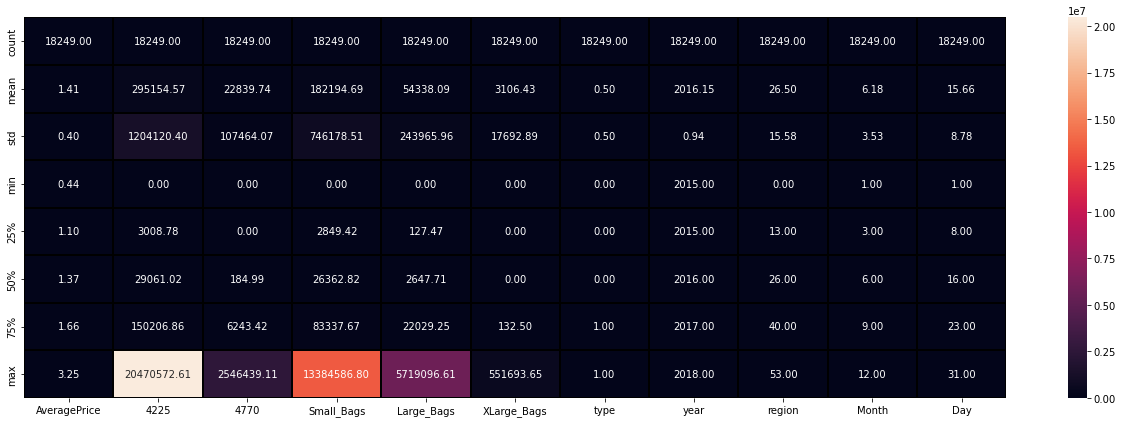

In [330]:
plt.figure(figsize = (22,7))
sns.heatmap(Avocado.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column



In [331]:
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   4225          18249 non-null  float64
 2   4770          18249 non-null  float64
 3   Small_Bags    18249 non-null  float64
 4   Large_Bags    18249 non-null  float64
 5   XLarge_Bags   18249 non-null  float64
 6   type          18249 non-null  float64
 7   year          18249 non-null  int64  
 8   region        18249 non-null  float64
 9   Month         18249 non-null  int64  
 10  Day           18249 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 2.2 MB


OUTLIERS CHECKING(Any One outlier method can be  used)

In [332]:
colmlist=Avocado.columns.values
ncol=30
nrows=14

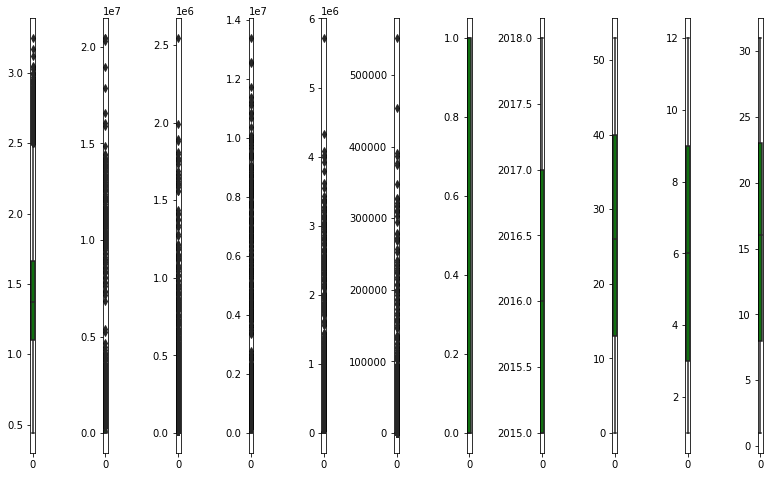

In [333]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Avocado[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

AveragePrice       AxesSubplot(0.125,0.125;0.0596154x0.755)
4225            AxesSubplot(0.196538,0.125;0.0596154x0.755)
4770            AxesSubplot(0.268077,0.125;0.0596154x0.755)
Small_Bags      AxesSubplot(0.339615,0.125;0.0596154x0.755)
Large_Bags      AxesSubplot(0.411154,0.125;0.0596154x0.755)
XLarge_Bags     AxesSubplot(0.482692,0.125;0.0596154x0.755)
type            AxesSubplot(0.554231,0.125;0.0596154x0.755)
year            AxesSubplot(0.625769,0.125;0.0596154x0.755)
region          AxesSubplot(0.697308,0.125;0.0596154x0.755)
Month           AxesSubplot(0.768846,0.125;0.0596154x0.755)
Day             AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

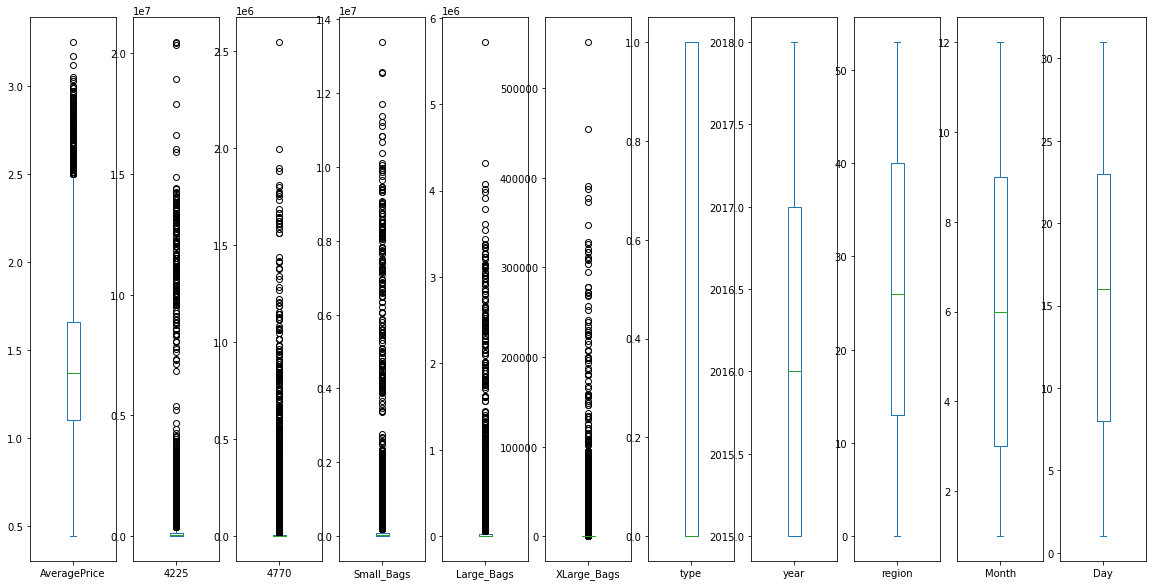

In [334]:
# to find out outliers in the dataset
Avocado.plot(kind='box',subplots=True,figsize=(20,10))

We can see that the Outliers are present in the columns R,ERA,SHO,SV and E ...we have to treat this Outliers ..

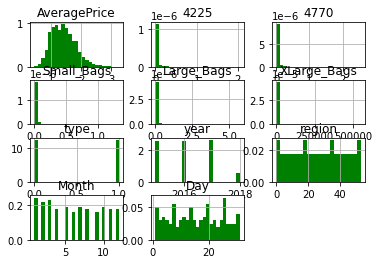

In [335]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Avocado.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see maximum data is not  normally distributed rest all are skewed or unbalanced data
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

Univariate Analysis

<AxesSubplot:xlabel='type', ylabel='Density'>

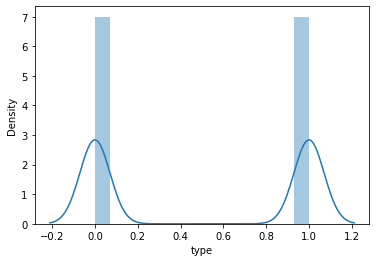

In [63]:
sns.distplot(Avocado['type'])

type is not normally distributed ,its Skewed

<AxesSubplot:xlabel='4225', ylabel='Density'>

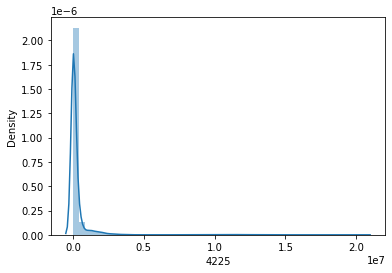

In [66]:
sns.distplot(Avocado['4225'])

4225 is also Normally distributed and skewed as per the graph

<AxesSubplot:xlabel='Small_Bags', ylabel='Density'>

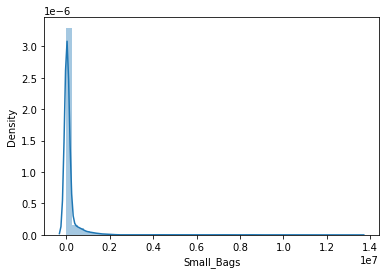

In [67]:
 sns.distplot(Avocado['Small_Bags'])
    

 Normally distributed and Skewed as per the graph

<AxesSubplot:xlabel='Large_Bags', ylabel='Density'>

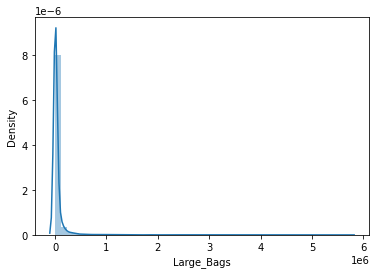

In [68]:
sns.distplot(Avocado['Large_Bags'])
    

Normally distributed and Skewed as per the graph

<AxesSubplot:xlabel='XLarge_Bags', ylabel='Density'>

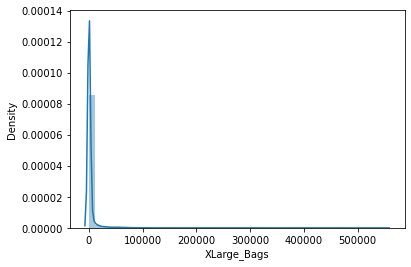

In [69]:
sns.distplot(Avocado['XLarge_Bags'])
    

Normally distributed and Skewed as per the graph

<AxesSubplot:xlabel='year', ylabel='Density'>

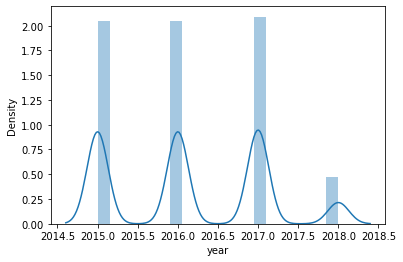

In [70]:
sns.distplot(Avocado['year'])

Normally distributed as per the graph ..

<AxesSubplot:xlabel='region', ylabel='Density'>

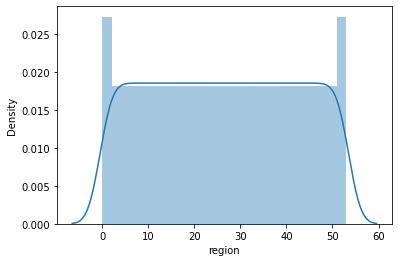

In [71]:
sns.distplot(Avocado['region'])

Normally distributed and Skewed as per the graph

<AxesSubplot:xlabel='Month', ylabel='Density'>

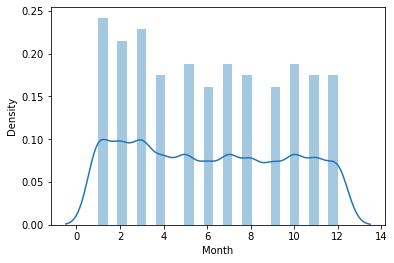

In [72]:
sns.distplot(Avocado['Month'])

Normally distributed and Skewed as per the graph

<AxesSubplot:xlabel='Day', ylabel='Density'>

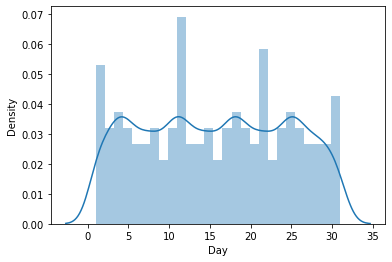

In [73]:
sns.distplot(Avocado['Day'])

Normally distributed and Skewed as per the graph

the data of the column is normalised ...The building block is out of normalized curve..It a right skewed data..
Maximum columns are normally distributed but some columns  have skewness. . . .


Normal distribution curve of outcome column is irrelevent

Now Lets Remove Outliers Now

In [336]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Avocado)) < 3).all()

AveragePrice    False
4225            False
4770            False
Small_Bags      False
Large_Bags      False
XLarge_Bags     False
type             True
year             True
region           True
Month            True
Day              True
dtype: bool

In [337]:
#to remove outliers in data set through zscore
z = np.abs(zscore(Avocado))
z.shape

(18249, 11)

In [338]:
threshold = 3
print(np.where(z>3))

(array([  780,   781,   783, ..., 17304, 17402, 17428], dtype=int64), array([5, 5, 2, ..., 0, 0, 0], dtype=int64))


In [339]:
Avocado_new=Avocado[(z<3).all(axis=1)]
print(Avocado_new.shape)


(17657, 11)


In [340]:
Avocado.shape

(18249, 11)

In [341]:
print ("Old DataFrame =",Avocado.shape)
print ("New DataFrame =",Avocado_new.shape)
print ("Total dropped rows = ",Avocado.shape[0] - Avocado_new.shape[0])

Old DataFrame = (18249, 11)
New DataFrame = (17657, 11)
Total dropped rows =  592


In [342]:
#to find % loss in data
loss = (18249-17657)/18249 * 100
print(loss)

3.244013370595649


In [352]:
Avocado_new

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1529.20,0.00,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,3431.50,0.00,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,2452.79,727.94,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,2981.04,727.01,10919.54,50.00,0.0,1.0,2018,53.0,1,14


Now Lets Split the dataset into dependent and independent variable*

In [353]:
# Independent column

x=Avocado_new.iloc[:,1:]
x

,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1529.20,0.00,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,3431.50,0.00,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,2452.79,727.94,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,2981.04,727.01,10919.54,50.00,0.0,1.0,2018,53.0,1,14


In [354]:
x.shape

(17657, 10)

In [355]:
# Target or dependent variable

y=Avocado_new.iloc[0:,0]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17657, dtype: float64

In [356]:
y.shape

(17657,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [357]:
Avocado.skew()

AveragePrice     0.580303
4225             8.942466
4770            10.159396
Small_Bags       9.540660
Large_Bags       9.796455
XLarge_Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

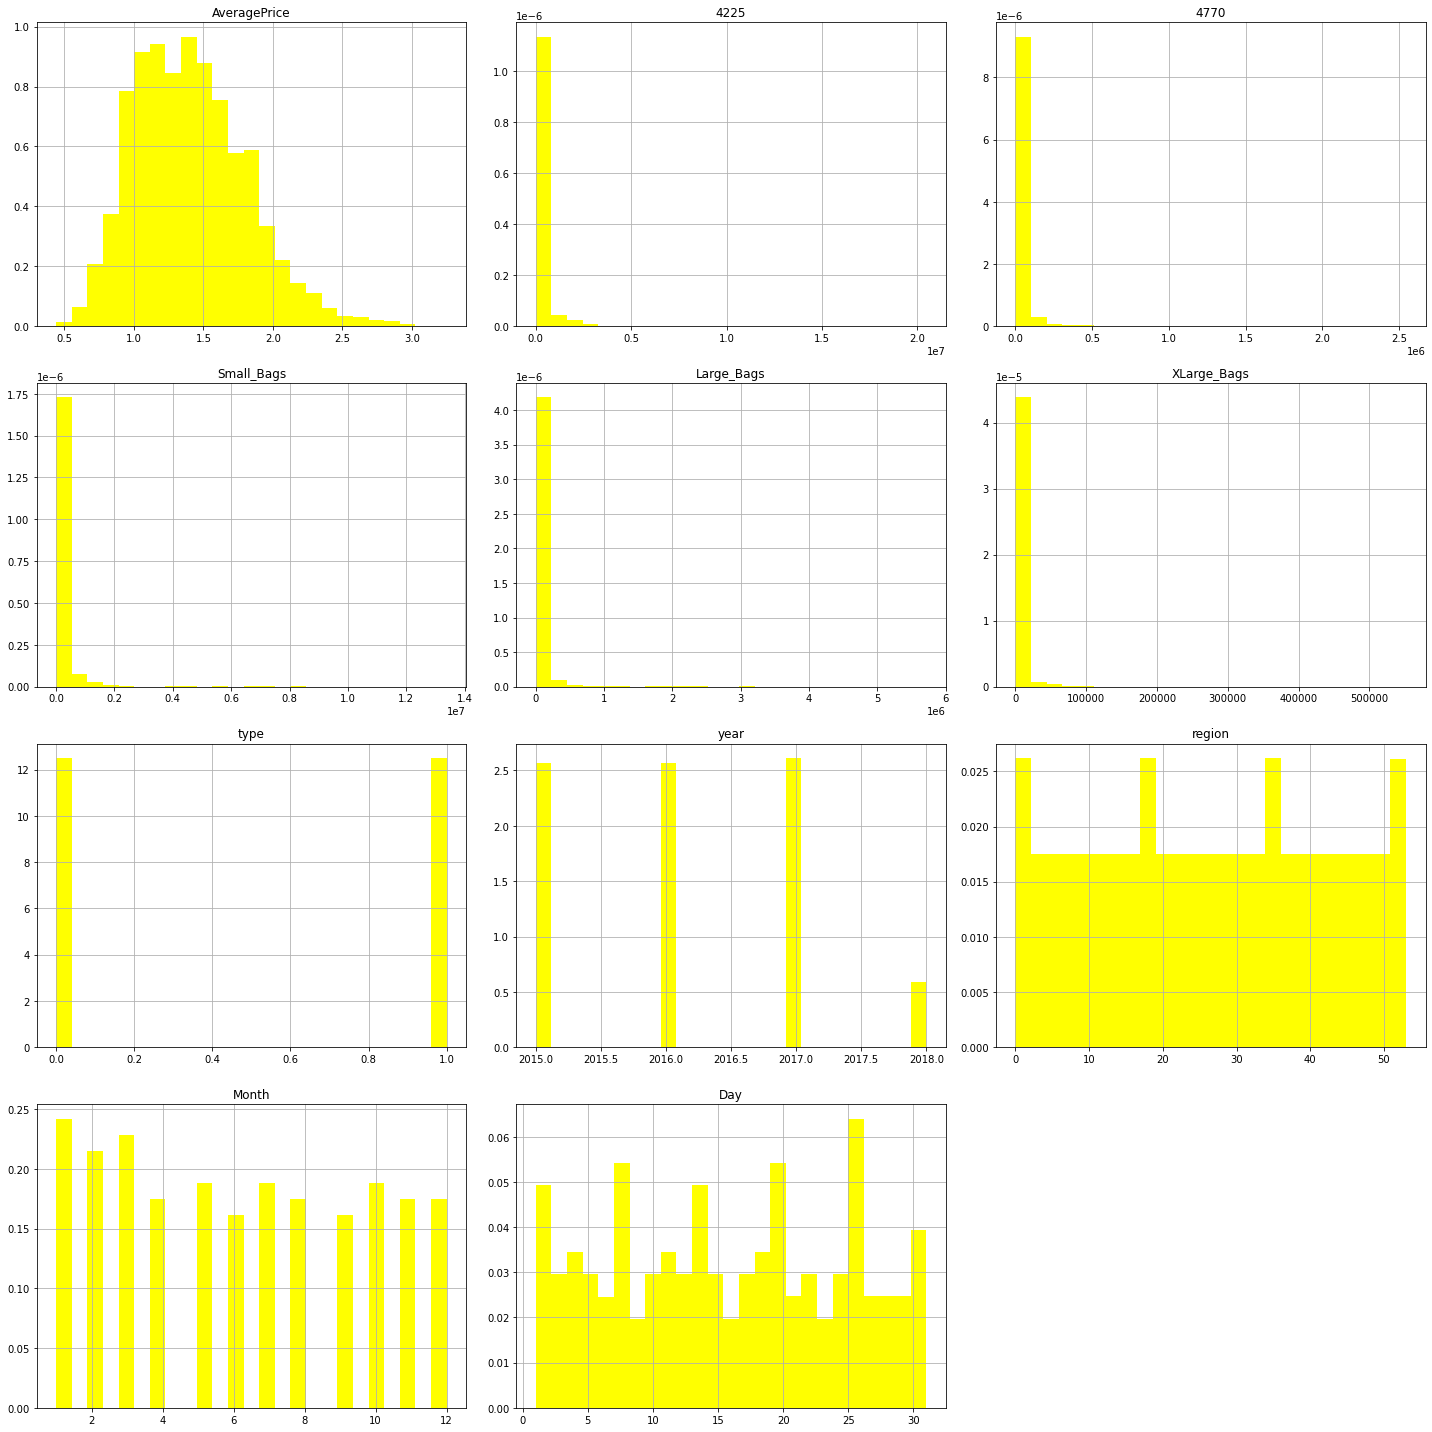

In [358]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
Avocado.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

there is skewness present  

Now Lets Remove Skewness Now

In [359]:
Avocado_new.skew()

AveragePrice    0.376973
4225            4.456086
4770            5.103115
Small_Bags      4.212717
Large_Bags      5.049910
XLarge_Bags     6.129158
type           -0.037049
year            0.230065
region          0.012566
Month           0.107782
Day             0.011806
dtype: float64

Here We have skewness ,. Now remove the skewness from the given columns

In [360]:
Avocado_new.head()


,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,11,29


In [361]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Avocado,method='yeo-johnson')

In [362]:
pd.DataFrame(x_new).skew()

0     0.005596
1    -0.017740
2     0.032184
3     0.007058
4    -0.073809
5     0.793520
6     0.000329
7     0.213156
8    -0.261443
9    -0.146584
10   -0.208462
dtype: float64

We can see that the skewness has been removed from the given columns  .

In [363]:
# It will be a 2 dimensional data contaning rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,-0.278787,-0.322585,-0.401248,-0.380144,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,1.289213
1,-0.303270,-0.322291,-0.397750,-0.380086,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,0.491632
2,-0.142369,-0.320202,-0.403689,-0.380009,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,-0.305948
3,-0.235086,-0.321879,-0.413971,-0.379590,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,-1.103528
4,-0.305267,-0.321786,-0.412628,-0.378714,-0.259275,-1.018694,-1.20979,-1.695460,1.362403,1.517093
...,...,...,...,...,...,...,...,...,...,...
17652,-0.410793,-0.323979,-0.381841,-0.375508,-0.259275,0.981649,1.98084,1.746754,-1.180151,-1.331409
17653,-0.406048,-0.323979,-0.399785,-0.376974,-0.259275,0.981649,1.98084,1.746754,-1.462656,1.403153
17654,-0.408489,-0.302910,-0.397995,-0.380842,-0.259275,0.981649,1.98084,1.746754,-1.462656,0.605572
17655,-0.407172,-0.302937,-0.391178,-0.380737,-0.259275,0.981649,1.98084,1.746754,-1.462656,-0.192008


In [364]:
x.mean()

4225          -1.173927e-15
4770           1.059286e-14
Small_Bags    -4.869966e-16
Large_Bags     5.440583e-15
XLarge_Bags   -4.918866e-15
type           3.969313e-15
year          -8.919553e-14
region        -4.086265e-16
Month          1.970748e-15
Day           -4.557341e-17
dtype: float64

In [365]:
x.std()

4225           1.000028
4770           1.000028
Small_Bags     1.000028
Large_Bags     1.000028
XLarge_Bags    1.000028
type           1.000028
year           1.000028
region         1.000028
Month          1.000028
Day            1.000028
dtype: float64

Balancing the dataset over here,otherwise it will be a baised dataset

In [366]:
x.shape

(17657, 10)

In [367]:
y.value_counts()

1.15    193
1.18    191
1.26    189
1.59    186
1.48    185
       ... 
2.53      2
2.60      2
0.44      1
0.48      1
0.46      1
Name: AveragePrice, Length: 215, dtype: int64

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

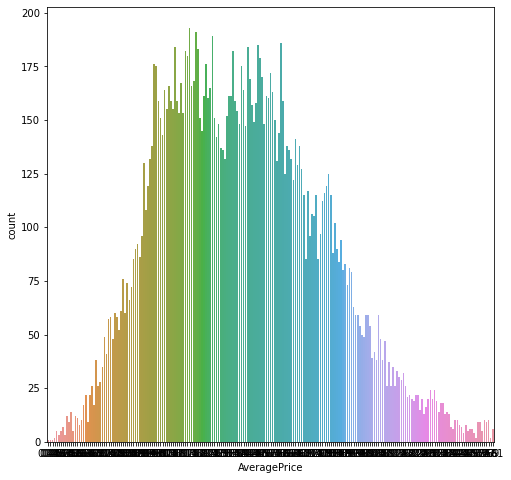

In [368]:
plt.figure(figsize=(8,8))
sns.countplot(y)

Now Lets Whether Multicollinearity is present in the dataset or not 

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [369]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [370]:
vif_cal()

   VIF FACTOR     FEATURES
0    3.154057         4225
1    1.936988         4770
2    4.208517   Small_Bags
3    1.606856   Large_Bags
4    1.802529  XLarge_Bags
5    1.219548         type
6    1.108964         year
7    1.051693       region
8    1.038247        Month
9    1.000864          Day


#No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...

Now Lets Train and Test the model using Regression Models

In [371]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.4666524243637974 on Random_State 95


In [372]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=95)

In [373]:
x_train

,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
7700,-0.224401,-0.243553,-0.094567,0.047046,-0.131463,-1.018694,0.917296,1.162227,-0.897645,-0.419888
3468,-0.249626,0.434557,-0.262617,-0.328808,1.642686,-1.018694,-0.146247,-0.786196,0.232379,0.947392
5388,-0.274876,-0.321814,-0.415215,-0.319234,-0.259275,-1.018694,0.917296,-1.695460,0.797391,0.947392
9283,-0.412546,-0.323979,-0.424076,-0.381421,-0.259275,0.981649,-1.209790,-0.981038,-1.180151,-0.875648
2475,-0.350688,-0.323169,-0.211359,-0.334572,-0.257127,-1.018694,-1.209790,1.422017,1.079897,-0.533828
...,...,...,...,...,...,...,...,...,...,...
4449,0.193576,0.316860,-0.101362,0.685508,-0.259275,-1.018694,-0.146247,0.447805,-1.180151,-0.192008
6487,-0.306423,-0.051748,-0.157701,0.860699,-0.259275,-1.018694,0.917296,-0.331564,-0.897645,1.175273
7588,0.452690,-0.201837,-0.094305,-0.373889,0.320702,-1.018694,0.917296,1.032332,-0.615139,0.833452
1794,0.740787,0.194927,0.718697,0.009048,-0.025921,-1.018694,-1.209790,0.577700,1.644908,-0.305948


In [375]:
x_test

,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
6953,0.369685,-0.258250,-0.239551,0.218373,-0.259275,-1.018694,0.917296,0.252963,-0.615139,0.035872
2228,0.007148,0.064338,0.084682,-0.381421,-0.259275,-1.018694,-1.209790,1.097280,0.514885,-0.761708
2258,0.278944,0.199232,-0.085499,-0.304296,-0.258983,-1.018694,-1.209790,1.097280,-1.462656,-0.533828
16201,-0.404026,-0.310153,-0.415089,-0.375041,-0.259275,0.981649,0.917296,0.707595,-1.462656,0.719512
10113,-0.414566,-0.323979,-0.424729,-0.381421,-0.259275,0.981649,-1.209790,0.058121,-1.180151,0.719512
...,...,...,...,...,...,...,...,...,...,...
4354,0.162854,-0.302694,-0.036165,-0.111115,-0.259275,-1.018694,-0.146247,0.382858,1.644908,-0.533828
12676,-0.410230,-0.323979,-0.438121,-0.362710,-0.259275,0.981649,-0.146247,-0.201669,-0.050127,1.175273
7045,0.153067,-0.311963,0.070459,-0.241976,0.141965,-1.018694,0.917296,0.382858,0.232379,0.833452
7992,-0.203706,-0.322541,-0.201122,0.372092,-0.259275,-1.018694,0.917296,1.551912,-0.615139,1.631033


In [376]:
y_train

7990    1.40
3558    1.60
5630    1.64
9744    1.35
2507    1.15
        ... 
4569    0.61
6769    1.02
7878    1.83
1822    1.02
7755    1.82
Name: AveragePrice, Length: 12359, dtype: float64

In [377]:
y_test

7243     1.46
2256     1.15
2286     1.06
16751    1.59
10574    1.52
         ... 
4474     1.37
13155    1.24
7335     1.47
8301     1.25
9070     1.24
Name: AveragePrice, Length: 5298, dtype: float64

  REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [379]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [380]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

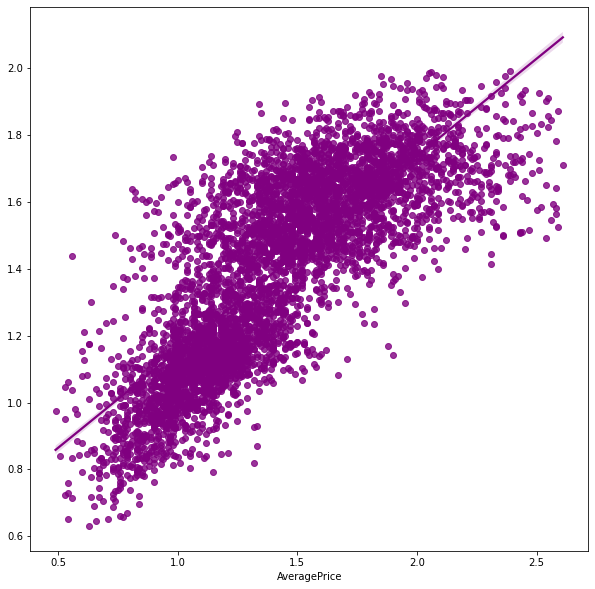

SVR()
Mean absolute error 0.17729504377645802
Mean squared error 0.05646357621884193
Root Mean squared error 0.23762065612829608
R2 Score 0.6254037414237765
At random state SVR(),the training accuracy is :- 0.6198733047757186
At random state SVR(),the testing accuracy is :- 0.6254037414237765
Cross Validation Score: -0.023432579261663068
Difference Between r2_score and CrossValidation Score: 0.6488363206854396
---------------------------------------------------------------------------------------------------------


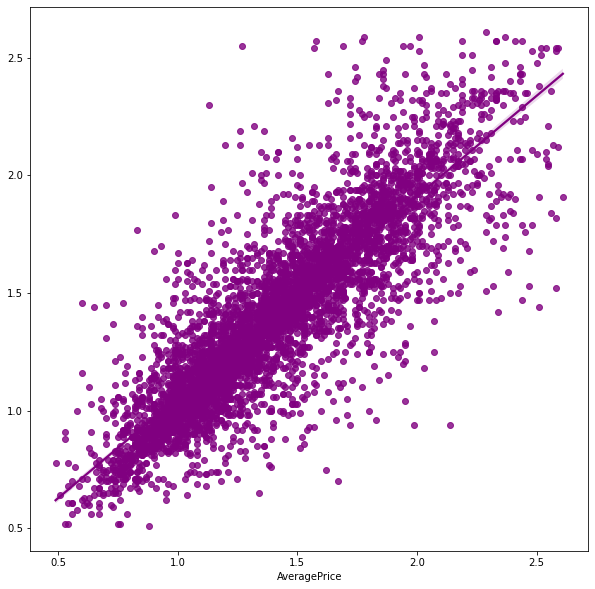

DecisionTreeRegressor()
Mean absolute error 0.13633824084560212
Mean squared error 0.041813627784069454
Root Mean squared error 0.20448380812198666
R2 Score 0.7225958826145975
At random state DecisionTreeRegressor(),the training accuracy is :- 1.0
At random state DecisionTreeRegressor(),the testing accuracy is :- 0.7225958826145975
Cross Validation Score: -0.4574977887096413
Difference Between r2_score and CrossValidation Score: 1.1800936713242387
---------------------------------------------------------------------------------------------------------


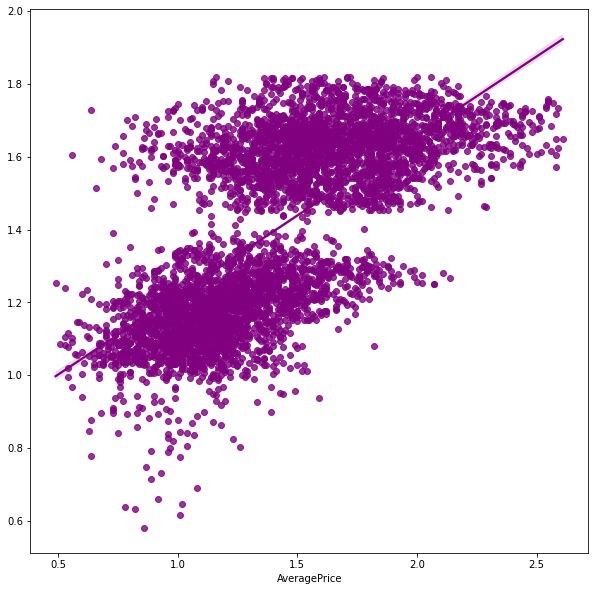

LinearRegression()
Mean absolute error 0.22391058328319613
Mean squared error 0.08138895541038862
Root Mean squared error 0.28528749606386294
R2 Score 0.46004131817664073
At random state LinearRegression(),the training accuracy is :- 0.4246415401538278
At random state LinearRegression(),the testing accuracy is :- 0.46004131817664073
Cross Validation Score: 0.014128084543200936
Difference Between r2_score and CrossValidation Score: 0.4459132336334398
---------------------------------------------------------------------------------------------------------


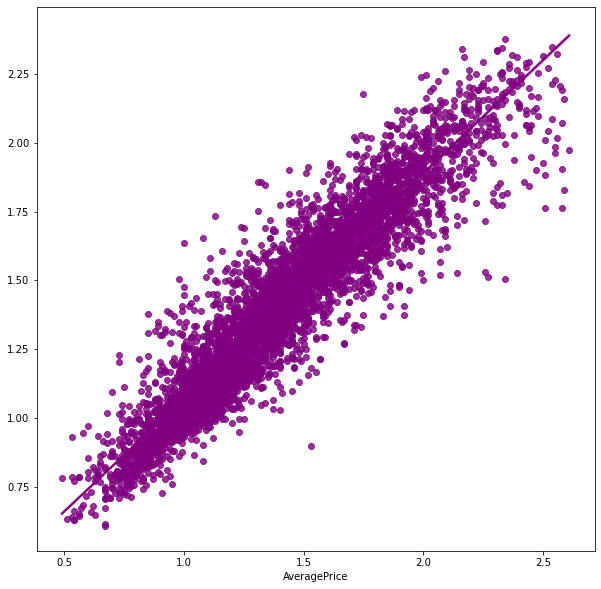

RandomForestRegressor()
Mean absolute error 0.09818714609286522
Mean squared error 0.019053449926387314
Root Mean squared error 0.13803423461731265
R2 Score 0.8735937123831634
At random state RandomForestRegressor(),the training accuracy is :- 0.9805772750431625
At random state RandomForestRegressor(),the testing accuracy is :- 0.8735937123831634
Cross Validation Score: 0.10742334051073074
Difference Between r2_score and CrossValidation Score: 0.7661703718724326
---------------------------------------------------------------------------------------------------------


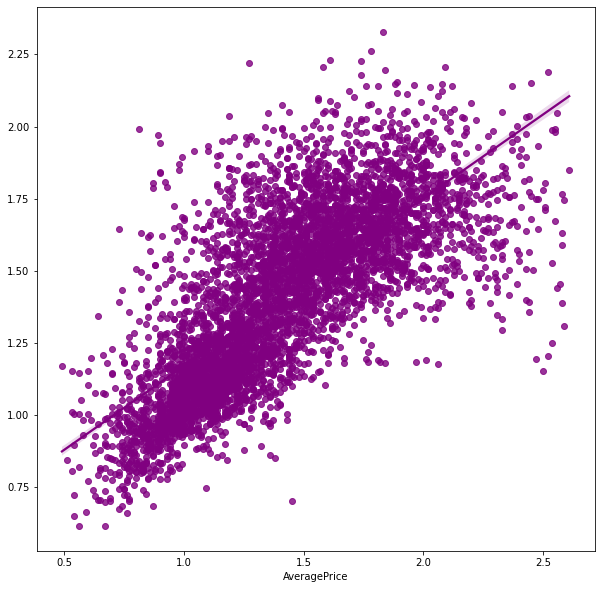

KNeighborsRegressor()
Mean absolute error 0.1891498678746697
Mean squared error 0.0677610570026425
Root Mean squared error 0.2603095407445576
R2 Score 0.5504528736901055
At random state KNeighborsRegressor(),the training accuracy is :- 0.7002695149189665
At random state KNeighborsRegressor(),the testing accuracy is :- 0.5504528736901055
Cross Validation Score: -0.11961878051826617
Difference Between r2_score and CrossValidation Score: 0.6700716542083717
---------------------------------------------------------------------------------------------------------


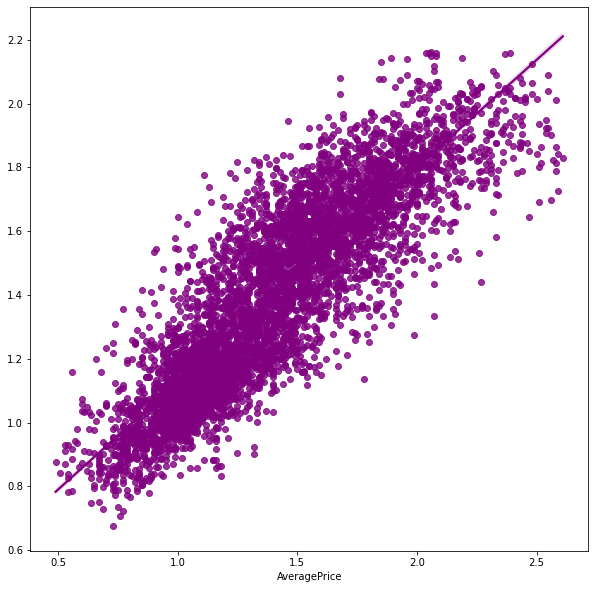

GradientBoostingRegressor()
Mean absolute error 0.15179739102515508
Mean squared error 0.03889960820017048
Root Mean squared error 0.19722983597866342
R2 Score 0.7419283604108258
At random state GradientBoostingRegressor(),the training accuracy is :- 0.7347719994620479
At random state GradientBoostingRegressor(),the testing accuracy is :- 0.7419283604108258
Cross Validation Score: 0.3562950253867864
Difference Between r2_score and CrossValidation Score: 0.38563333502403935
---------------------------------------------------------------------------------------------------------


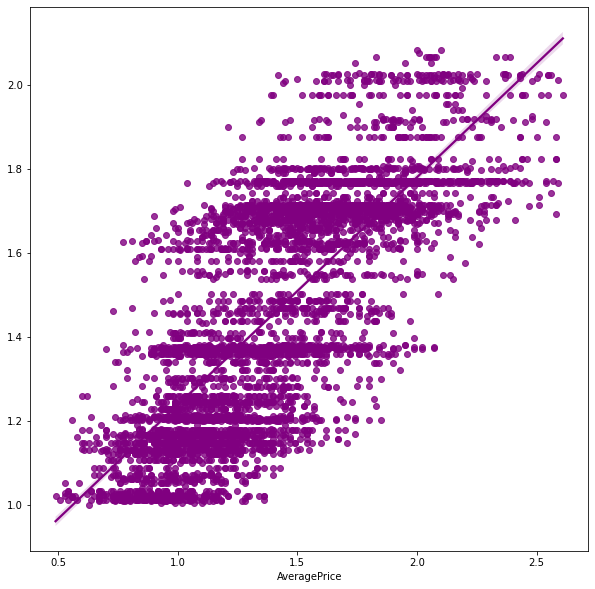

AdaBoostRegressor()
Mean absolute error 0.2064987287750197
Mean squared error 0.06657960776112555
Root Mean squared error 0.25803024582619294
R2 Score 0.5582909614487459
At random state AdaBoostRegressor(),the training accuracy is :- 0.5398597685643759
At random state AdaBoostRegressor(),the testing accuracy is :- 0.5582909614487459
Cross Validation Score: -0.05408098977595148
Difference Between r2_score and CrossValidation Score: 0.6123719512246973
---------------------------------------------------------------------------------------------------------


In [381]:
for i in models:
    create_model(i)

Now Lets consider model which Model should we go for as a final model

Hyper parameter tuning

In [382]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [383]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(RandomForestRegressor(),params, cv=5)

In [384]:
RSCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6],
                                        'min_samples_leaf': [3, 5, 6],
                                        'min_samples_split': [5, 6],
                                        'n_estimators': [13, 15, 17]})

In [385]:
RSCV.best_params_

{'n_estimators': 17,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': 6}

In [386]:
Final_Model = RandomForestRegressor(n_estimators=17,min_samples_split=6,min_samples_leaf=5,max_depth=6)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 67.22565985017116


In [387]:
Final_Model

RandomForestRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=6,
                      n_estimators=17)

In [388]:
from sklearn.model_selection import GridSearchCV

In [389]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [390]:
GSCV=GridSearchCV(RandomForestRegressor(),params, cv=5)


In [391]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6], 'min_samples_leaf': [3, 5, 6],
                         'min_samples_split': [5, 6],
                         'n_estimators': [13, 15, 17]})

In [392]:
GSCV.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 15}

In [393]:
Last_Model = RandomForestRegressor(n_estimators=15,min_samples_split=5,min_samples_leaf=3,max_depth=6)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

R2 score for the Last_Model is: 66.94169203457281


In [394]:
Last_Model

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=15)

In [395]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [396]:
lasso= Lasso(alpha=0.0001)

In [397]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [398]:
lasso.score(x_train,y_train)

0.4246397582818753

In [399]:
lasso_pred=lasso.predict(x_test)

In [400]:
r2_score(y_test,lasso_pred)

0.459998419505394

In [401]:
ridge=Ridge(alpha=0.1)

In [402]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [403]:
ridge.score(x_train,y_train)*100

42.46415401047548

In [404]:
ridge_pred=ridge.predict(x_test)

In [405]:
r2_score(y_test,ridge_pred)

0.46004085726596766

save the final model

In [406]:
#saving the model
import joblib
joblib.dump(Final_Model,'Avocado.pkl')

['Avocado.pkl']

In [407]:
#Loading the saved model
AV=joblib.load('Avocado.pkl')

Prediction

In [408]:
prediction =AV.predict(x_test)
prediction

array([1.36532949, 1.08339229, 1.03307866, ..., 1.37732332, 1.36532949,
       1.26435816])

In [409]:
pd.DataFrame([AV.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,5288,5289,5290,5291,5292,5293,5294,5295,5296,5297
Predicted,1.365329,1.083392,1.033079,1.609654,1.554769,1.62784,1.943562,1.627192,1.268191,1.06341,...,1.183682,1.180951,1.670976,1.499958,1.672761,1.140581,1.593102,1.377323,1.365329,1.264358
Original,1.460000,1.150000,1.060000,1.590000,1.520000,1.68000,2.030000,1.410000,1.170000,1.04000,...,0.900000,1.350000,1.850000,1.630000,2.070000,1.370000,1.240000,1.470000,1.250000,1.240000


In [410]:
import pickle
filename = 'Avocado.pkl'
pickle.dump(Final_Model,open(filename, 'wb'))

In [411]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

67.22565985017116


# Avacado project as Classifier problem


In [412]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [413]:
Avocado_Reg=pd.read_csv('avocado.csv')
Avocado_Reg

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [414]:
# List of values in the target column
Avocado['region'].value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

In [415]:
#Frequency of 'region'
Avocado['region'].value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

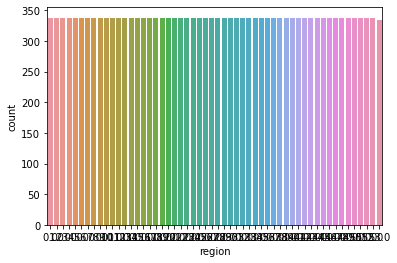

In [416]:
# Plotting the 'region' frequency
sns.countplot(data=Avocado,x='region')

In [417]:
#Normalizing the frequency table of 'region' variable
Avocado['region'].value_counts(normalize=True)

0.0     0.018522
40.0    0.018522
29.0    0.018522
30.0    0.018522
31.0    0.018522
32.0    0.018522
33.0    0.018522
34.0    0.018522
35.0    0.018522
36.0    0.018522
37.0    0.018522
38.0    0.018522
39.0    0.018522
41.0    0.018522
1.0     0.018522
42.0    0.018522
43.0    0.018522
44.0    0.018522
45.0    0.018522
46.0    0.018522
47.0    0.018522
48.0    0.018522
49.0    0.018522
50.0    0.018522
51.0    0.018522
52.0    0.018522
28.0    0.018522
27.0    0.018522
26.0    0.018522
25.0    0.018522
2.0     0.018522
3.0     0.018522
4.0     0.018522
5.0     0.018522
6.0     0.018522
7.0     0.018522
8.0     0.018522
9.0     0.018522
10.0    0.018522
11.0    0.018522
12.0    0.018522
13.0    0.018522
14.0    0.018522
15.0    0.018522
16.0    0.018522
17.0    0.018522
18.0    0.018522
19.0    0.018522
20.0    0.018522
21.0    0.018522
22.0    0.018522
23.0    0.018522
24.0    0.018522
53.0    0.018357
Name: region, dtype: float64

In [418]:
#Frequency table
Avocado['region'].value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

In [419]:
Avocado.corr()

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
4225,-0.172928,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Small_Bags,-0.174730,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large_Bags,-0.172940,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge_Bags,-0.117592,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013
year,0.093197,-0.009559,-0.036531,0.063915,0.087891,0.081033,-0.000032,1.000000,-0.000055,-0.177050,0.004475
region,-0.011716,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,-0.000055,1.000000,-0.000144,-0.000021
Month,0.162409,-0.022108,-0.033424,-0.023126,-0.020187,-0.012969,-0.000085,-0.177050,-0.000144,1.000000,0.010621


In [420]:
Avocado.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
Month          -0.000144
year           -0.000055
Day            -0.000021
XLarge_Bags     0.082281
4770            0.095252
4225            0.145726
Small_Bags      0.164702
Large_Bags      0.198768
region          1.000000
Name: region, dtype: float64

<AxesSubplot:>

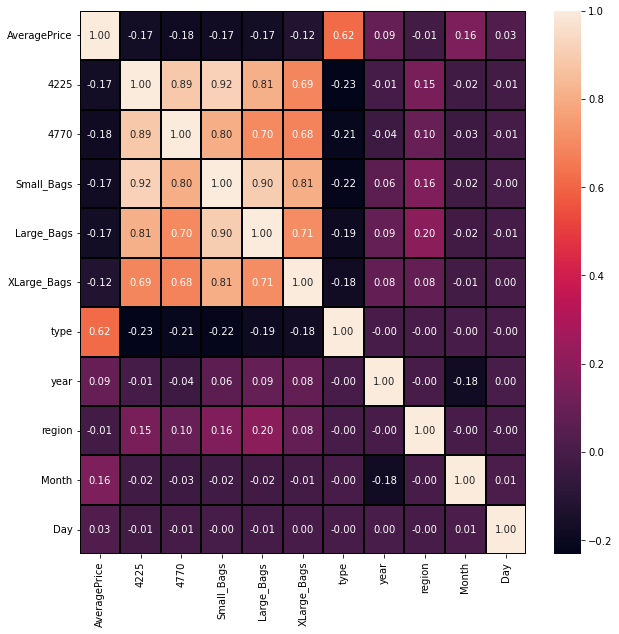

In [421]:
plt.figure(figsize = (10,10))
sns.heatmap(Avocado.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

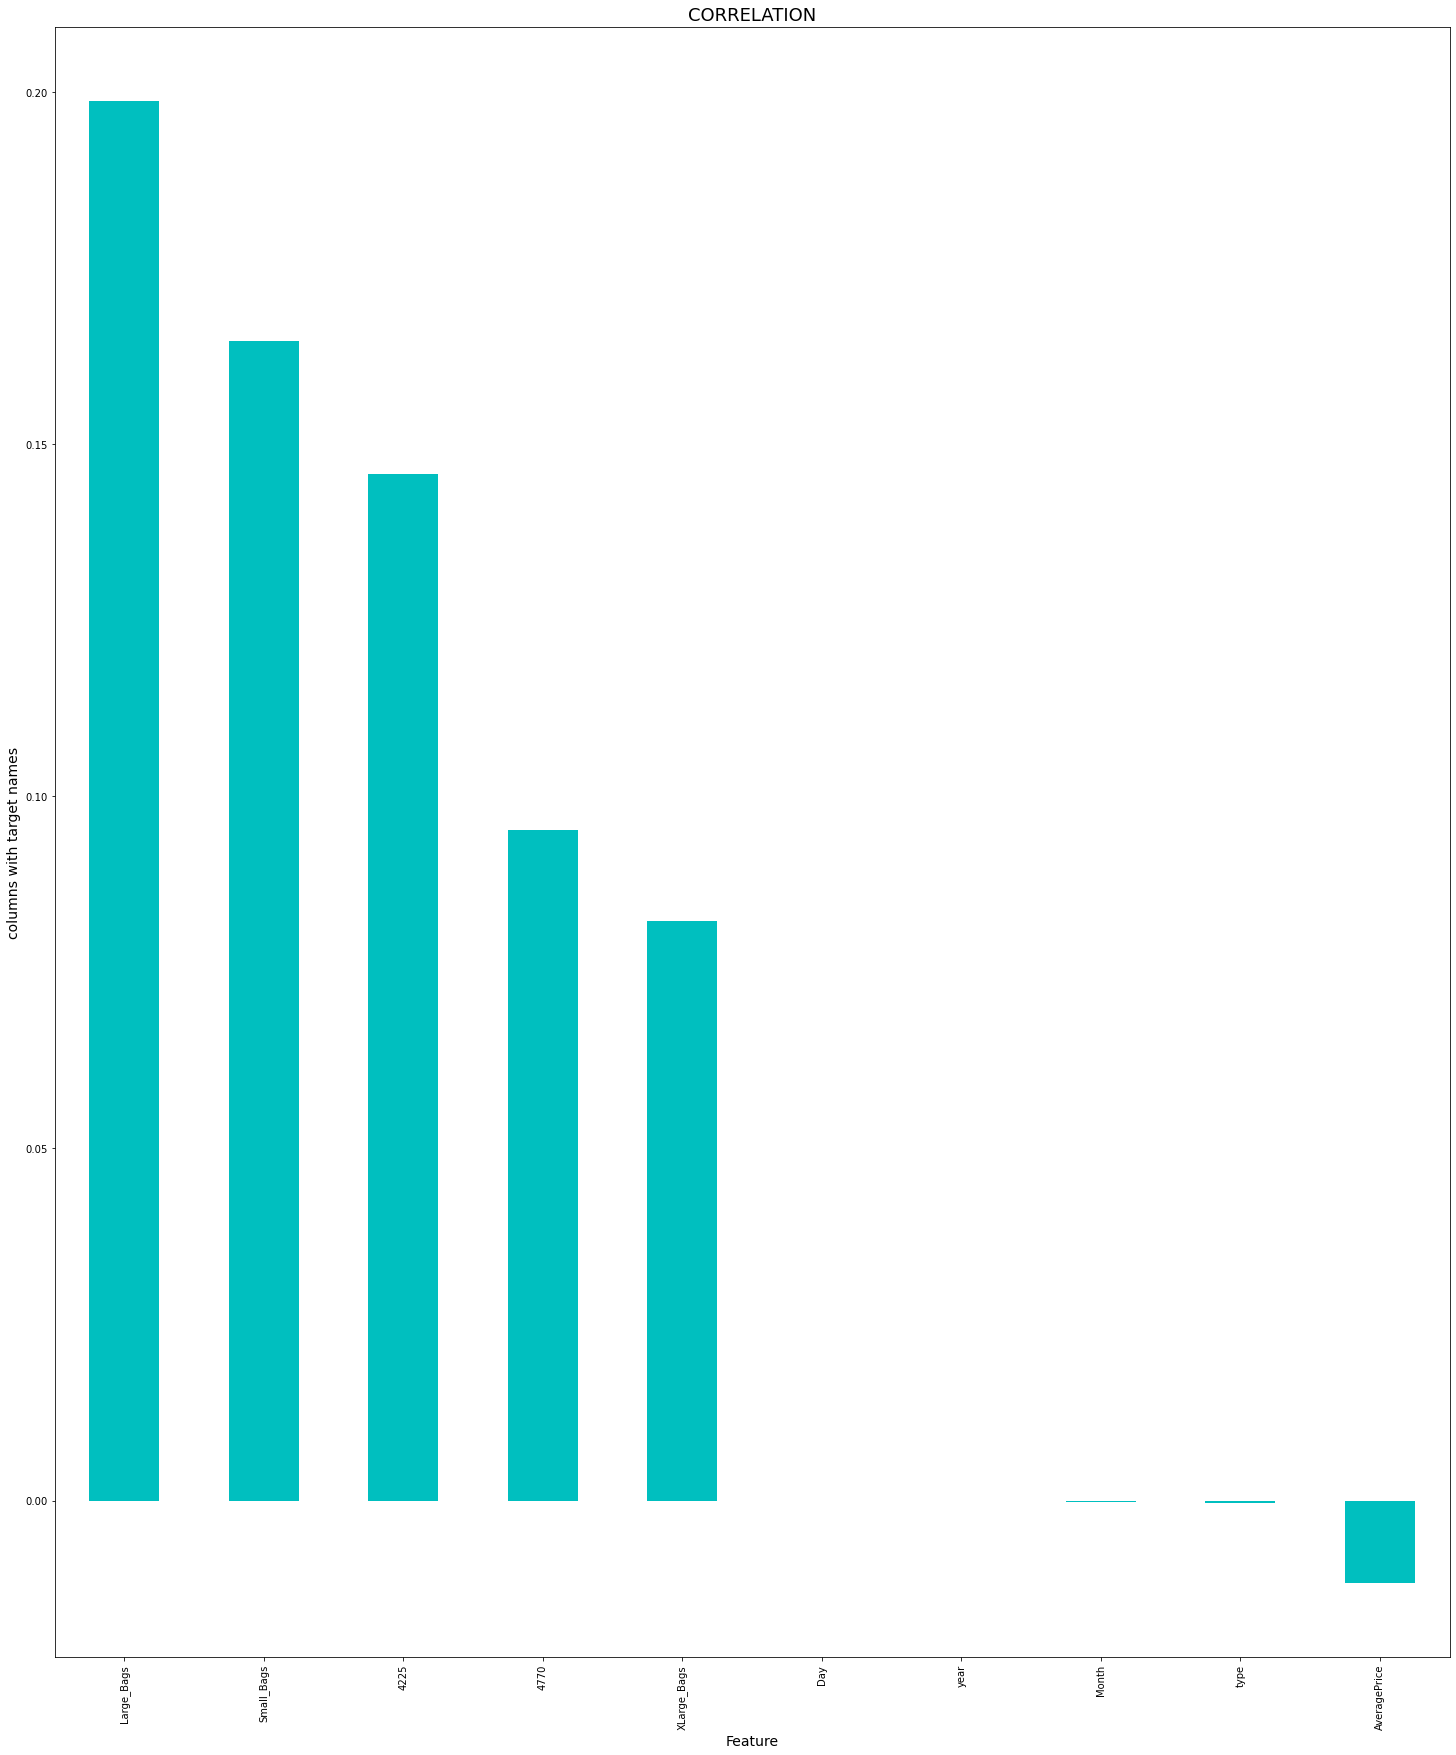

In [422]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Avocado.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [423]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Avocado)) < 3).all()

AveragePrice    False
4225            False
4770            False
Small_Bags      False
Large_Bags      False
XLarge_Bags     False
type             True
year             True
region           True
Month            True
Day              True
dtype: bool

In [424]:
threshold = 3
print(np.where(z>3))

(array([  780,   781,   783, ..., 17304, 17402, 17428], dtype=int64), array([5, 5, 2, ..., 0, 0, 0], dtype=int64))


In [425]:
Avocado_new=Avocado[(z<3).all(axis=1)]
print(Avocado_new.shape)


(17657, 11)


In [426]:
Avocado_new=Avocado[(z<3).all(axis=1)]
Avocado_new

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1529.20,0.00,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,3431.50,0.00,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,2452.79,727.94,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,2981.04,727.01,10919.54,50.00,0.0,1.0,2018,53.0,1,14


In [427]:
print(Avocado.shape)
print(Avocado_new.shape)

(18249, 11)
(17657, 11)


In [429]:
#to find % loss in data
loss = (18249-17657)/18249 * 100
print(loss)


3.244013370595649


In [430]:
Avocado_new.skew()

AveragePrice    0.376973
4225            4.456086
4770            5.103115
Small_Bags      4.212717
Large_Bags      5.049910
XLarge_Bags     6.129158
type           -0.037049
year            0.230065
region          0.012566
Month           0.107782
Day             0.011806
dtype: float64

Removing skewness using yeo-johnson  method to get better prediction

In [431]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Avocado,method='yeo-johnson')

In [432]:
pd.DataFrame(x_new).skew()

0     0.005596
1    -0.017740
2     0.032184
3     0.007058
4    -0.073809
5     0.793520
6     0.000329
7     0.213156
8    -0.261443
9    -0.146584
10   -0.208462
dtype: float64

In [433]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,-0.278787,-0.322585,-0.401248,-0.380144,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,1.289213
1,-0.303270,-0.322291,-0.397750,-0.380086,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,0.491632
2,-0.142369,-0.320202,-0.403689,-0.380009,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,-0.305948
3,-0.235086,-0.321879,-0.413971,-0.379590,-0.259275,-1.018694,-1.20979,-1.695460,1.644908,-1.103528
4,-0.305267,-0.321786,-0.412628,-0.378714,-0.259275,-1.018694,-1.20979,-1.695460,1.362403,1.517093
...,...,...,...,...,...,...,...,...,...,...
17652,-0.410793,-0.323979,-0.381841,-0.375508,-0.259275,0.981649,1.98084,1.746754,-1.180151,-1.331409
17653,-0.406048,-0.323979,-0.399785,-0.376974,-0.259275,0.981649,1.98084,1.746754,-1.462656,1.403153
17654,-0.408489,-0.302910,-0.397995,-0.380842,-0.259275,0.981649,1.98084,1.746754,-1.462656,0.605572
17655,-0.407172,-0.302937,-0.391178,-0.380737,-0.259275,0.981649,1.98084,1.746754,-1.462656,-0.192008


In [434]:
x.mean()

4225          -1.206630e-15
4770           1.049689e-14
Small_Bags    -4.997167e-16
Large_Bags     5.500606e-15
XLarge_Bags   -4.918866e-15
type           3.965980e-15
year          -2.854575e-14
region        -4.086265e-16
Month          1.970748e-15
Day           -4.557341e-17
dtype: float64

In [435]:
x.std()

4225           1.000028
4770           1.000028
Small_Bags     1.000028
Large_Bags     1.000028
XLarge_Bags    1.000028
type           1.000028
year           1.000028
region         1.000028
Month          1.000028
Day            1.000028
dtype: float64

In [436]:
Avocado_new['region'].value_counts()

0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
35.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
18.0    338
27.0    338
8.0     338
2.0     338
13.0    338
12.0    338
11.0    338
4.0     338
5.0     338
10.0    338
9.0     338
20.0    337
1.0     337
28.0    337
33.0    336
41.0    336
40.0    336
14.0    336
50.0    336
31.0    335
24.0    335
25.0    333
48.0    333
21.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    296
6.0     292
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

In [437]:
x.shape

(17657, 10)

In [438]:
y.shape

(17657,)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [439]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [440]:
vif_cal()

   VIF FACTOR     FEATURES
0    3.154057         4225
1    1.936988         4770
2    4.208517   Small_Bags
3    1.606856   Large_Bags
4    1.802529  XLarge_Bags
5    1.219548         type
6    1.108964         year
7    1.051693       region
8    1.038247        Month
9    1.000864          Day


In [441]:
Avocado_new

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1529.20,0.00,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,3431.50,0.00,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,2452.79,727.94,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,2981.04,727.01,10919.54,50.00,0.0,1.0,2018,53.0,1,14


In [442]:
#seperate feature variable and target variable
x = Avocado_new.drop (['region'], axis = 1)
y = Avocado_new['region']

In [443]:
x

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,Month,Day
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,12,27
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,12,20
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,12,13
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,12,6
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1529.20,0.00,13066.82,431.85,0.0,1.0,2018,2,4
18245,1.71,3431.50,0.00,8940.04,324.80,0.0,1.0,2018,1,28
18246,1.87,2452.79,727.94,9351.80,42.31,0.0,1.0,2018,1,21
18247,1.93,2981.04,727.01,10919.54,50.00,0.0,1.0,2018,1,14


In [444]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 17657, dtype: float64

In [447]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.12372593431483579 on Random_State 35


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [ ]:
x_train

In [212]:
x_test

,AveragePrice,4225,4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,Month,Day
1641,0.98,33611.14,561.66,48219.72,37841.41,0.00,0.0,2015,6,7
7471,1.02,493193.16,5719.66,417190.30,97986.16,31.62,0.0,2017,12,31
1480,1.27,956051.10,5130.14,306199.58,47542.37,616.72,0.0,2015,7,12
7861,2.07,304989.35,10147.53,94445.66,932.19,3577.24,0.0,2017,8,20
13003,1.63,164.40,9.96,1753.33,0.00,0.00,1.0,2016,5,29
...,...,...,...,...,...,...,...,...,...,...
5856,1.66,452146.49,3286.69,112280.36,5416.40,2794.17,0.0,2017,6,18
14133,2.38,20860.73,0.00,2771.16,53.33,0.00,1.0,2016,9,4
16613,2.12,19190.49,973.47,20082.79,12385.16,0.00,1.0,2017,9,3
10677,1.85,17398.87,26.54,33457.94,31.96,0.00,1.0,2015,3,1


In [213]:
y_train

2371     45.0
2026     38.0
7205     29.0
14243    44.0
13393    28.0
         ... 
2876      1.0
16337    30.0
15919    22.0
9604      9.0
6103      9.0
Name: region, Length: 12359, dtype: float64

In [214]:
y_test

1641     31.0
7471     35.0
1480     28.0
7861     42.0
13003    20.0
         ... 
5856      4.0
14133    42.0
16613    35.0
10677    29.0
7053     27.0
Name: region, Length: 5298, dtype: float64

In [221]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is
[[ 0  0  0 ...  0  0  0]
 [ 2 11  0 ...  6  4  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  6 19  0]
 [ 0 14  0 ...  2 20  0]
 [ 0 16  0 ...  0  5  3]]
0.12061155152887883
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        90
         1.0       0.04      0.13      0.07        84
         2.0       0.16      0.14      0.15       108
         3.0       0.00      0.00      0.00        95
         4.0       0.10      0.09      0.10        97
         5.0       0.00      0.00      0.00        88
         6.0       0.12      0.27      0.16        97
         7.0       0.18      0.16      0.17        82
         8.0       0.70      0.39      0.50        99
         9.0       0.12      0.31      0.17       111
        10.0       0.06      0.03      0.04       106
        11.0       0.00      0.00      0.00       101
        12.0       0.12      0.35      0.18       110
        13.0       0.31    

Accuracy_score: DecisionTreeClassifier() is
[[68  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  2]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  5  2 ...  0  0 49]]
0.6851642129105323
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        90
         1.0       0.49      0.49      0.49        84
         2.0       0.86      0.71      0.78       108
         3.0       0.73      0.74      0.73        95
         4.0       0.72      0.79      0.75        97
         5.0       0.51      0.57      0.54        88
         6.0       0.82      0.77      0.80        97
         7.0       0.64      0.71      0.67        82
         8.0       0.90      0.87      0.88        99
         9.0       0.68      0.71      0.69       111
        10.0       0.59      0.55      0.57       106
        11.0       0.71      0.68      0.70       101
        12.0       0.70      0.75      0.72       110
        13.0       0.60 

Accuracy_score: GradientBoostingClassifier() is
[[70  0  0 ...  0  0  1]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  1  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  3  0 ...  0  0 58]]
0.7295205738014345
              precision    recall  f1-score   support

         0.0       0.68      0.78      0.73        90
         1.0       0.54      0.52      0.53        84
         2.0       0.91      0.84      0.87       108
         3.0       0.71      0.68      0.70        95
         4.0       0.70      0.81      0.75        97
         5.0       0.58      0.60      0.59        88
         6.0       0.93      0.82      0.87        97
         7.0       0.80      0.90      0.85        82
         8.0       0.85      0.88      0.87        99
         9.0       0.75      0.72      0.73       111
        10.0       0.57      0.58      0.58       106
        11.0       0.71      0.75      0.73       101
        12.0       0.83      0.72      0.77       110
        13.0       0

In [224]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())


cross validation score of random forest model =  0.5443097746444452
cross validation score of logistic regression model =  0.09372615561955217
cross validation score of decison tree model =  0.42260396751246765
cross validation score of  KNeighborsClassifier model =  0.2894524247780458
cross validation score of standard vector machine model =  0.19622069276073786
cross validation score of GaussianNB model =  0.17407938039811116
cross validation score of AdaBoostingClassifier model =  0.04491031225454019
cross validation score of GradientBoostingClassifier model =  0.4799195797904533


In [491]:

# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[35]}

In [492]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=35), parameters, verbose=1, cv=10, n_jobs=-1)

In [493]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=35),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'random_state': [35]},
             verbose=1)

In [457]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 35}

In [458]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [459]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=35)

In [479]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

84.06002265005662


In [480]:
#saving the model
import joblib
joblib.dump(gcv,'AvocadoClass.pkl')

['AvocadoClass.pkl']

In [481]:
#Loading the saved model
Avc=joblib.load('AvocadoClass.pkl')

In [490]:
prediction = Avc.predict(x_test)
prediction

array([40., 24., 52., ..., 32., 16., 22.])

In [483]:
pd.DataFrame([Avc.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531
Predicted,40.0,24.0,52.0,36.0,0.0,14.0,16.0,39.0,40.0,14.0,...,48.0,13.0,40.0,20.0,31.0,19.0,39.0,32.0,16.0,22.0
Original,40.0,24.0,52.0,41.0,0.0,14.0,16.0,39.0,40.0,14.0,...,48.0,13.0,40.0,20.0,31.0,19.0,10.0,32.0,16.0,22.0


In [487]:
import pickle
filename = 'AvocadoClass.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [489]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

84.06002265005662
